<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/DataAnalysis_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.


#### Project Title: The Sepsis Illness Classification Analysis

#### Project Description: This project seeks to create a classification model to classify patients Sepsis positive or negative 

#### Hypothesis: 
#### Null Hypothesis: 
#### Alternate Hypothesis: 
####
#### Assumptions:
1. It assumed that no patient can have any of the attributes as 0
2. It was assumed that the blood pressure used was the diastolic type.


#### Questions

1. How many patients are under weight, have healthy weight, over weight, obesed and severe obesed?
2. What is the distribution of ages for patients captured in the data?
3. How many of the patients fall under the Normal, Elevated and High Blood Pressure?
4. Is Body Mass Index affected by Age?
5. Is Blood Pressure affected by Age?
6. What is the relationship between Age and Body In



## Notebook overview

This notebook is a guide to start practicing Data Analysis.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# For CSV, use pandas.read_csv
df = pd.read_csv('../datasets/Paitients_Files_Train.csv')
df.head(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [4]:
# display the datatypes
df.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

**All the data types are of numeric data types**

In [5]:
# check the shape of the data
df.shape

(599, 11)

**The dataset has 11 columns and 599 rows**

In [6]:
# check for null values
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [7]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

**All rows had values**

In [8]:
print(f"The maximum age is {df['Age'].max()} and minimum age {df['Age'].min()}.")
df['Age'].value_counts()

The maximum age is 81 and minimum age 21.


21    52
22    52
25    40
24    37
23    27
29    27
28    26
26    25
27    21
41    20
31    19
37    18
30    16
33    15
42    13
36    13
32    13
38    13
46    11
35    10
39    10
34     9
40     8
43     8
45     8
44     7
58     7
51     7
60     5
57     5
52     5
54     4
62     4
55     4
50     4
47     4
53     3
49     3
59     3
48     3
63     3
65     3
66     3
67     3
56     2
61     2
64     1
69     1
72     1
81     1
Name: Age, dtype: int64

**52 of the patients were 22 years old, that was the hisghest number of times an age occured**

In [9]:
# create a function to print the number of unique values
def print_unique_values(data):
    values = {}
    for col in data.columns:
        number = data[col].nunique()
        print(f'{col}: has {number} of unique values')   

In [10]:
print_unique_values(df)

ID: has 599 of unique values
PRG: has 17 of unique values
PL: has 129 of unique values
PR: has 44 of unique values
SK: has 51 of unique values
TS: has 164 of unique values
M11: has 233 of unique values
BD2: has 437 of unique values
Age: has 50 of unique values
Insurance: has 2 of unique values
Sepssis: has 2 of unique values


In [11]:
def number_of_zeros(data):
    for col in data.columns:
        if col != 'Sepssis':
            count = (data[col] == 0).sum()
            print(f'Count of zeros in Column  {col} : {count}')

In [12]:
number_of_zeros(df)

Count of zeros in Column  ID : 0
Count of zeros in Column  PRG : 93
Count of zeros in Column  PL : 5
Count of zeros in Column  PR : 28
Count of zeros in Column  SK : 175
Count of zeros in Column  TS : 289
Count of zeros in Column  M11 : 9
Count of zeros in Column  BD2 : 0
Count of zeros in Column  Age : 0
Count of zeros in Column  Insurance : 188


**Although there were no null values in the columns, some of the columns had 0's in the them**

In [14]:
df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**The mean age for the patients captured is 33.29. The mean blood pressure is 68.732 mm hg which is lower than 80 mm hg, hence indicates that thepatients had averagely a normal pressure**

In [51]:
# find the correlation between the columns
corr_matrix = df.corr()
corr_matrix

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


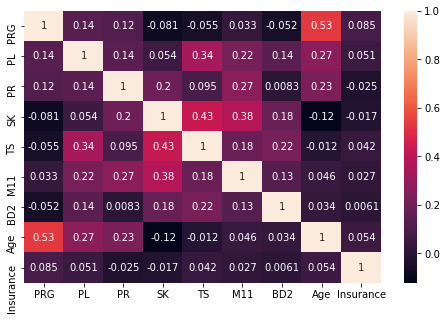

In [52]:
# lowest correlations
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True)
plt.show();


In [54]:
# get the minimum value
min_corr = corr_matrix.min().min()  
# get the columns involved
min_corr_cols = corr_matrix.unstack().idxmin()

print('The minimum correlation was:', min_corr)
print('The columns involved are:', min_corr_cols)

The minimum correlation was: -0.12155329275228288
The columns involved are: ('SK', 'Age')


In [60]:
# get the minimum value
max_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
            .max().max())  
# get the maximum value (excluding same columns)
# get the columns involved
max_corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
                 .stack().idxmax()) 

print('The maximun correlation was:', max_corr)
print('The columns involved are:', max_corr_cols)

The maximun correlation was: 0.5325446086908504
The columns involved are: ('PRG', 'Age')


**The lowest correlation is -0.12155329275228288 between Sk and Age.** 

**The highest correlation is 0.5325446086908504 between PRG and Age**

In [16]:
# check the number of duplicates
df.duplicated().sum()

0

The follwing are the bmi ranges

>- under 18.5 – This is described as underweight.
>- between 18.5 and 24.9 – This is described as the 'healthy range'.
>- between 25 and 29.9 – This is described as overweight.
>- between 30 and 39.9 – This is described as obesity.
>- 40 or over – This is described as severe obesity.

In [17]:
# value count for values in Sepssis

df['Sepssis'].value_counts()

Negative    391
Positive    208
Name: Sepssis, dtype: int64

**The number of patients who tested negative were almost twice as many as the ones that tested positve. Clearly the data is slightly unbalanced**

### Replace the zero values with the mean of the each column


In [18]:
# Make a copy of the dataframe
data = df.copy()

In [61]:
# replace the zeros
data = data.replace(0, data.mean())

# display the head 
data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,BMI Ranges,Blood pressure category
0,ICU200010,6.000000,148.0,72.0,35.000000,79.460768,33.6,0.627,50,0.686144,Positive,Obesity,normal
1,ICU200011,1.000000,85.0,66.0,29.000000,79.460768,26.6,0.351,31,0.686144,Negative,Over Weight,normal
2,ICU200012,8.000000,183.0,64.0,20.562604,79.460768,23.3,0.672,32,1.000000,Positive,Healthy Weight,normal
3,ICU200013,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,1.000000,Negative,Over Weight,normal
4,ICU200014,3.824708,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.000000,Positive,Severe Obesity,normal


In [20]:
# confirm that zeros  have been replaced
number_of_zeros(data)

Count of zeros in Column  ID : 0
Count of zeros in Column  PRG : 0
Count of zeros in Column  PL : 0
Count of zeros in Column  PR : 0
Count of zeros in Column  SK : 0
Count of zeros in Column  TS : 0
Count of zeros in Column  M11 : 0
Count of zeros in Column  BD2 : 0
Count of zeros in Column  Age : 0
Count of zeros in Column  Insurance : 0


## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

### 1. How many patients are under weight, have healthy weight, over weight, obesed and severe obesed?


In [21]:
# function to create a new column 'Bmi'
def create_bmi_range(row):
    if (row['M11'] <= 18.5):
        return 'Under Weight'
    elif (row['M11'] > 18.5) and (row['M11'] <= 24.9):
        return 'Healthy Weight'
    elif (row['M11'] > 24.9) and (row['M11'] <= 29.9):
        return 'Over Weight'
    elif (row['M11'] > 29.9) and (row['M11'] < 40):
        return 'Obesity'
    elif row['M11'] >= 40:
        return 'Severe Obesity'

In [22]:
data['BMI Ranges'] = data.apply(create_bmi_range, axis=1)
range_count = data['BMI Ranges'].value_counts()

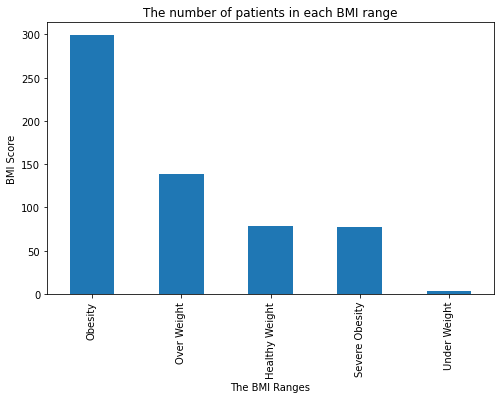

In [23]:
# plot graph
plt.figure(figsize=(8, 5))
range_count.plot.bar()
plt.title('The number of patients in each BMI range')
plt.xlabel('The BMI Ranges')
plt.ylabel('BMI Score')
plt.show()

>- Based on the graph above, most of the of the patients fall under the obesity category. The next category with a higher number of patients was the over weight category. The least was Under Weight category

### 2. What is the distribution of ages for patients captured in the data?

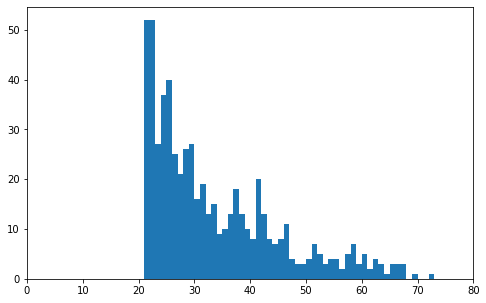

In [24]:

age_bins = np.arange(0, data['Age'].max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'Age', bins=age_bins);
plt.xlim(0, 80);

>-  From the distribution of ages most of the patients fell within the range 20 years to 40 years.

### 3. How many of the patients fall under the Normal, Elevated and High Blood Pressure?

In [25]:
# create a function to create a new column called blood pressure ranges
def blood_pressure_ranges(row):
    if row.PR < 80:
        return 'normal'
    elif row.PR >= 80 and row.PR <= 89:
        return 'elevated'
    elif row.PR >= 90:
        return 'high'


In [26]:
# create new column
data['Blood pressure category'] = data.apply(blood_pressure_ranges, axis=1)
data['Blood pressure category'].head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: Blood pressure category, dtype: object

In [27]:
BP_range = data['Blood pressure category'].value_counts()

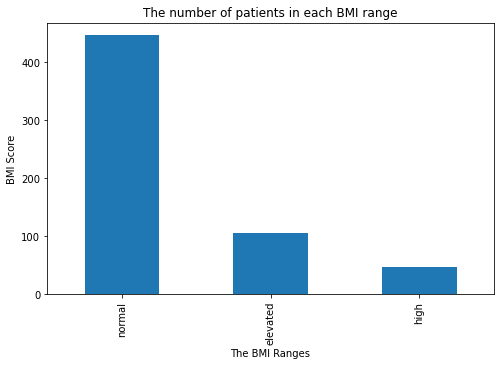

In [28]:
plt.figure(figsize=(8, 5))
BP_range.plot.bar()
plt.title('The number of patients in each BMI range')
plt.xlabel('The BMI Ranges')
plt.ylabel('BMI Score')
plt.show()

>- From the graph above more than 400 patients fell under the normal blood pressure category, followed by the elevated then high.

## Bivariate Analysis

### 4. Is Body Mass Index affected by Age?

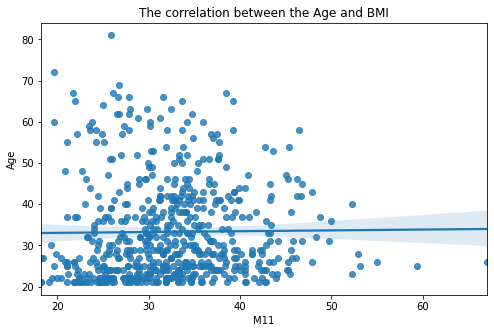

In [29]:
plt.figure(figsize=(8, 5))
sns.regplot(x='M11', y='Age', data=data)
plt.title('The correlation between the Age and BMI')
plt.show()

In [48]:
corr = data['M11'].corr(data['Age'])
round(corr, 6)

0.011801

>- The correlation between ages and M11(bmi) is alsmot a straight line. This means it is  very small. The correlation was 0.011801.

### 5. Is Blood Pressure affected by Age?

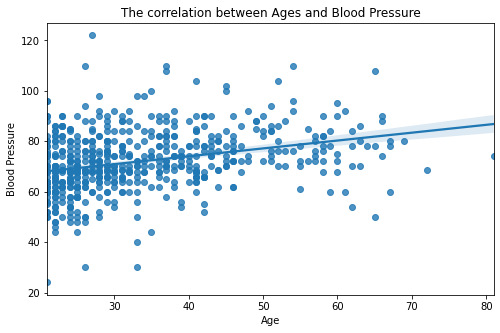

In [31]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='PR', data=data)
plt.title('The correlation between Ages and Blood Pressure')
plt.ylabel('Blood Pressure')
plt.show();

In [49]:
corr_ = data['PR'].corr(data['Age'])
round(corr_, 6)

0.30937

>- From the graph there is slightly a strong correlation between blood pressure and ages. The values was 0.30937

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

### 6. What is the relationship between Age and Body Ma Index Ranges and Sepsis?

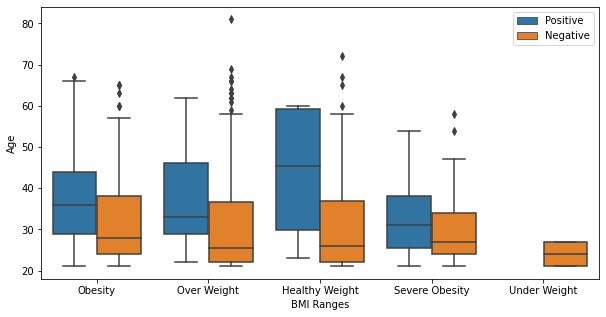

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, y='Age', x='BMI Ranges', hue='Sepssis');
# plt.ylim(-10, 3500);
plt.legend();

>- From the graph above,  most people that tested positive for sepsis had healthy weights and fell between the ages of  25 to 60. The Obesity category which had more number of patient recorded less patients who tested positive for sepsis.

### How does Blood Pressure and Plasma glucose affect the Sepssis 

In [78]:
# create function to plot facet grids
def plot_facet_grid(data, x, y, z, title, xlabel, ylabel):
    facet = sns.FacetGrid(data = data, col = z, col_wrap = 2, height = 5,
                     xlim = [10, 80], ylim = [-500, 9000])
    facet.map(plt.scatter, x, y, alpha= 1)
    facet.set_xlabels(xlabel)
    facet.set_ylabels(ylabel)
    facet.set(xlim=(0, 20))
    facet.set(ylim=(0, 200))
    facet.fig.suptitle(title, fontsize=14, fontweight='bold', y=1.05)

#     facet.fig.suptitle(title, )
    plt.show()

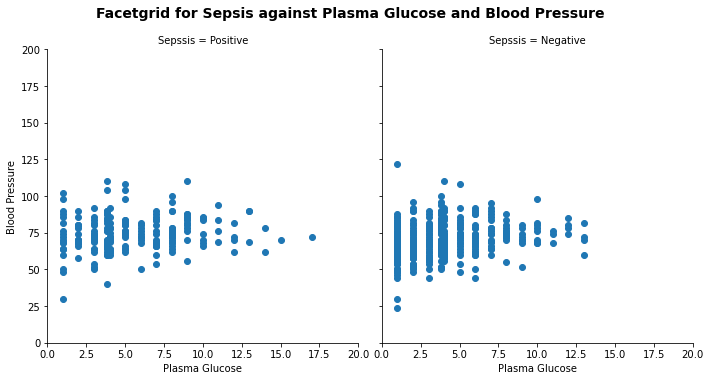

In [79]:
facet_sepssis = plot_facet_grid(data, 'PRG', 'PR', 'Sepssis', 
                                  'Facetgrid for Sepsis against Plasma Glucose and Blood Pressure', \
                                  'Plasma Glucose', 'Blood Pressure')
facet_sepssis

>- In both Positive and Negative Sepsis there is almost no correlation btween Plasma and Blood Pressure

# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

## Missing/NaN Values
Handle the missing/NaN values using the Scikif-learn SimpleImputer

In [34]:
# Code Here

## Scaling
Scale the numeric features using the Scikif-learn StandardScaler, MinMaxScaler, or another Scaler.

In [35]:
# Code here

## Encoding
Encode the categorical features using the Scikif-learn OneHotEncoder.

In [36]:
# Code here